In [2]:
# def plot_all(dirname,expname,gurobi=False, fcla=False,
#              log=True, sortby="vcount",xlabel="Network size [Nodes]"):
#     if (gurobi):
#         results15 = load_results(os.path.join(data_path, "geometric_with_coords", dirname, "solutions", "gurobi"), 
#                            os.path.join(data_path,'geometric_with_coords',dirname))
#     if (fcla):
#         results15_fcla = load_results(os.path.join(data_path, "geometric_with_coords", dirname, "solutions", "fcla"), 
#                                    os.path.join(data_path,'geometric_with_coords',dirname))
#     results15_fcla_l0 = load_results(os.path.join(data_path, "geometric_with_coords", dirname, "solutions", "fcla_l0"), 
#                                os.path.join(data_path,'geometric_with_coords',dirname))
#     results15_hilbert = load_results(os.path.join(data_path, "geometric_with_coords", dirname, "solutions", "hilbert"), 
#                                os.path.join(data_path,'geometric_with_coords',dirname))
    
#     fig, (ax1, ax2) = plt.subplots(2,figsize=(5, 5), dpi=300)
#     ax1.set_yscale("log", nonposx='clip')
#     if (log):
#         ax1.set_xscale("log", nonposx='clip')
#     if (fcla):
#         results15_fcla = results15_fcla.sort_values(by=sortby)
#     if (gurobi):
#         results15 = results15.sort_values(by=sortby)
#     results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
#     results15_hilbert = results15_hilbert.sort_values(by=sortby)
#     if (fcla):
#         ax1.plot(results15_fcla[sortby],results15_fcla['runtime'], 'k.-', label="WMA BF")
#     if (gurobi):
#         ax1.plot(results15[sortby],results15['runtime'], 'g^--', label="Gurobi")
#     results15_fcla_l0 = results15_fcla_l0[results15_fcla_l0['objective'].notnull()]
#     ax1.plot(results15_fcla_l0[sortby],results15_fcla_l0['runtime'], 'ro:',label="WMA")
#     ax1.plot(results15_hilbert[sortby],results15_hilbert['runtime'], 'bs-',label="Hilbert")
#     ax1.set_ylabel("Runtime [Sec]")
# #     plt.title(expname)
# #     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#               ncol=3, mode="expand", borderaxespad=0.)
#     plt.setp(ax1.get_xticklabels(), visible=False)
    
# #     fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
# #     ax2.set_yscale("log", nonposx='clip')
    
#     if (log):
#         ax2.set_xscale("log", nonposx='clip')
#     if (fcla):
#         results15_fcla = results15_fcla.sort_values(by=sortby)
#     if (gurobi):
#         results15 = results15.sort_values(by=sortby)
#     results15_fcla_l0 = results15_fcla_l0.sort_values(by=sortby)
#     results15_hilbert = results15_hilbert.sort_values(by=sortby)
#     if (fcla):
#         ax2.plot(results15_fcla[sortby],results15_fcla['objective'], 'k.-',label="WMA BF")
        
#     #filter nan 
# #     notnanind = results15_hilbert['objective'].notnull()
# #     obj =results15_hilbert['objective']
# #     obj= obj[notnanind]
# #     ind = results15_fcla_l0[sortby]
# #     ind = ind[notnanind]
#     ax2.plot(results15_fcla_l0[sortby],results15_fcla_l0['objective'], 'ro:',label="WMA")
#     ax2.plot(results15_hilbert[sortby],results15_hilbert['objective'], 'bs-',label="Hilbert")
#     if (gurobi):
#         ax2.plot(results15[sortby],results15['objective'], 'g^--',label="Gurobi")
#     ax2.set_xlabel(xlabel)
#     ax2.set_ylabel("Objective")
#     if (not log):
#         ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     ax2.ticklabel_format(style='sci', axis='y')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys
import pandas as pd
import pickle
import re
import matplotlib.ticker as mtick
import matplotlib as mpl

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

sns.set_style("whitegrid")
sns.set_context(font_scale=2.7)
# sns.set(font='sans-serif')
import matplotlib
from mergeResults import *

In [132]:
expnames = [("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
            ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'s'),
            ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
#             ("fcla_g_rand_siaobj", "WMA Naive SIA", sns.xkcd_rgb["black"],'^'),
#             ("nlr", "BRNN", sns.xkcd_rgb["amber"],'D'),
             ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]
# expnames = [("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
#             ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'s')]

expnames = [#("nlr", "BRNN", sns.xkcd_rgb["amber"],'D'),
            ("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
            ("fcla_g_rand", "WMA Naive", sns.xkcd_rgb["dusty purple"],'s'),
            ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'s'),
#             ("fcla_g_rand_siaobj", "WMA Naive SIA", sns.xkcd_rgb["black"],'^'),
            
             ("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]

typedir = "geometric_with_coords"

def plot_all(dirname, expname, log=True, sortby="vcount",xlabel="Network size [Nodes]",lims=None):
    fontscale = 1.1
#     fig, (ax1, ax2) = plt.subplots(2,figsize=(4, 5), dpi=300)
    fig, (ax1, ax2) = plt.subplots(2,figsize=(5, 6), dpi=300)
    sns.set(font_scale=fontscale,style="whitegrid")
    
    for expname in expnames:
        results = load_results(os.path.join(data_path, typedir, dirname, "solutions", expname[0]), 
                               os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
        results = results[results['objective'].notnull()]
        
#         results = results[results['vcount'] <= 9000]
        
        runtime_results = results['runtime'].copy()
        if (re.match(r'gurobi',expname[0])):
#             runtime_results += results['sptime']
            for i in range(len(runtime_results)):
                try:
                    f = open(os.path.join(data_path, typedir, dirname, results.iloc[i]['id'] + '.ntw.txt'), "r")
                    distmatxtime = float(f.read())
                    f.close()
                    runtime_results.loc[results.iloc[i].name] += distmatxtime
                except IOError:
                    print("No gurobi file exists for ", expname[0])
                    
        sns.set(font_scale=fontscale,style="whitegrid")
        ax1.plot(results[sortby], runtime_results, expname[2], label=expname[1], marker=expname[3])
        ax2.plot(results[sortby], results['objective'], expname[2], label=expname[1], marker=expname[3])
        
    # setting first axis
    ax1.set_yscale("log")
    if (log):
        ax1.set_xscale("log", basex=10)
        ax2.set_xscale("log", basex=10)
        
    ax1.set_ylabel("Runtime [Sec]")
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=5, mode="expand", borderaxespad=0.,fontsize='xx-small',frameon=True)
    plt.setp(ax1.get_xticklabels(), visible=False)
    # setting second axis
#     ax2.ticklabel_format(style='sci', axis='y')
#     ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    ax2.yaxis.get_major_formatter().set_powerlimits((0, 0))
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    if (lims):
        ax1.set_xlim(lims[0], lims[1])
        ax2.set_xlim(lims[0], lims[1])
#     ax2.set_ylim([7000,170000])

In [106]:
dirname='n_m-n0.20_k-n0.1_c4_d2'
sortby="vcount"
fontscale = 1.1
plt.figure(figsize=(3,3), dpi=300)
sns.set(font_scale=fontscale,style="whitegrid")

expname = "hilbert"
results_hilbert = load_results(os.path.join(data_path, typedir, dirname, "solutions", expname), 
                       os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
results_hilbert = results_hilbert[results_hilbert['objective'].notnull()]
results_hilbert = results_hilbert[:5]

expname = "gurobi"
results_gurobi = load_results(os.path.join(data_path, typedir, dirname, "solutions", expname), 
                       os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
results_gurobi = results_gurobi[results_gurobi['objective'].notnull()]


expname = "fcla_l0"
results_wma = load_results(os.path.join(data_path, typedir, dirname, "solutions", expname), 
                       os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
results_wma = results_wma[results_wma['objective'].notnull()][:5]


expname = "fcla_g_rand_siaobj"
results_wma_n = load_results(os.path.join(data_path, typedir, dirname, "solutions", expname), 
                       os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
results_wma_n = results_wma_n[results_wma_n['objective'].notnull()][:5]

<Figure size 900x900 with 0 Axes>

In [114]:
results

,index,objective
0,1.000000,0.516147
1,0.200000,0.606011
2,-inf,0.550492
3,-2.000000,0.575183
4,1.000000,0.546708


Text(0.5,1,'Relative increase in objective in comparison to Hilbert')

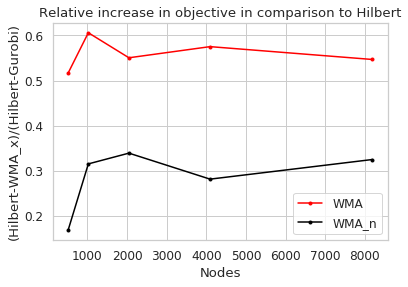

In [121]:
results = (results_hilbert['objective'].reset_index()-results_wma['objective'].reset_index())/(results_hilbert['objective'].reset_index()-results_gurobi['objective'].reset_index())           
results2 = (results_hilbert['objective'].reset_index()-results_wma_n['objective'].reset_index())/(results_hilbert['objective'].reset_index()-results_gurobi['objective'].reset_index())          
#     ax1.plot(results[sortby], runtime_results, expname[2], label=expname[1], marker=expname[3])
plt.plot(results_wma_n[sortby][:5], results['objective'], label='WMA', marker='.', color="red")
plt.plot(results_wma_n[sortby][:5], results2['objective'], label='WMA_n', color='black', marker='.')
plt.legend()
plt.xlabel("Nodes")
plt.ylabel("(Hilbert-WMA_x)/(Hilbert-Gurobi)")
plt.title("Relative increase in objective in comparison to Hilbert")

In [ ]:
plot_all('n_m-n0.20_k-n0.1_c4_d2', True)

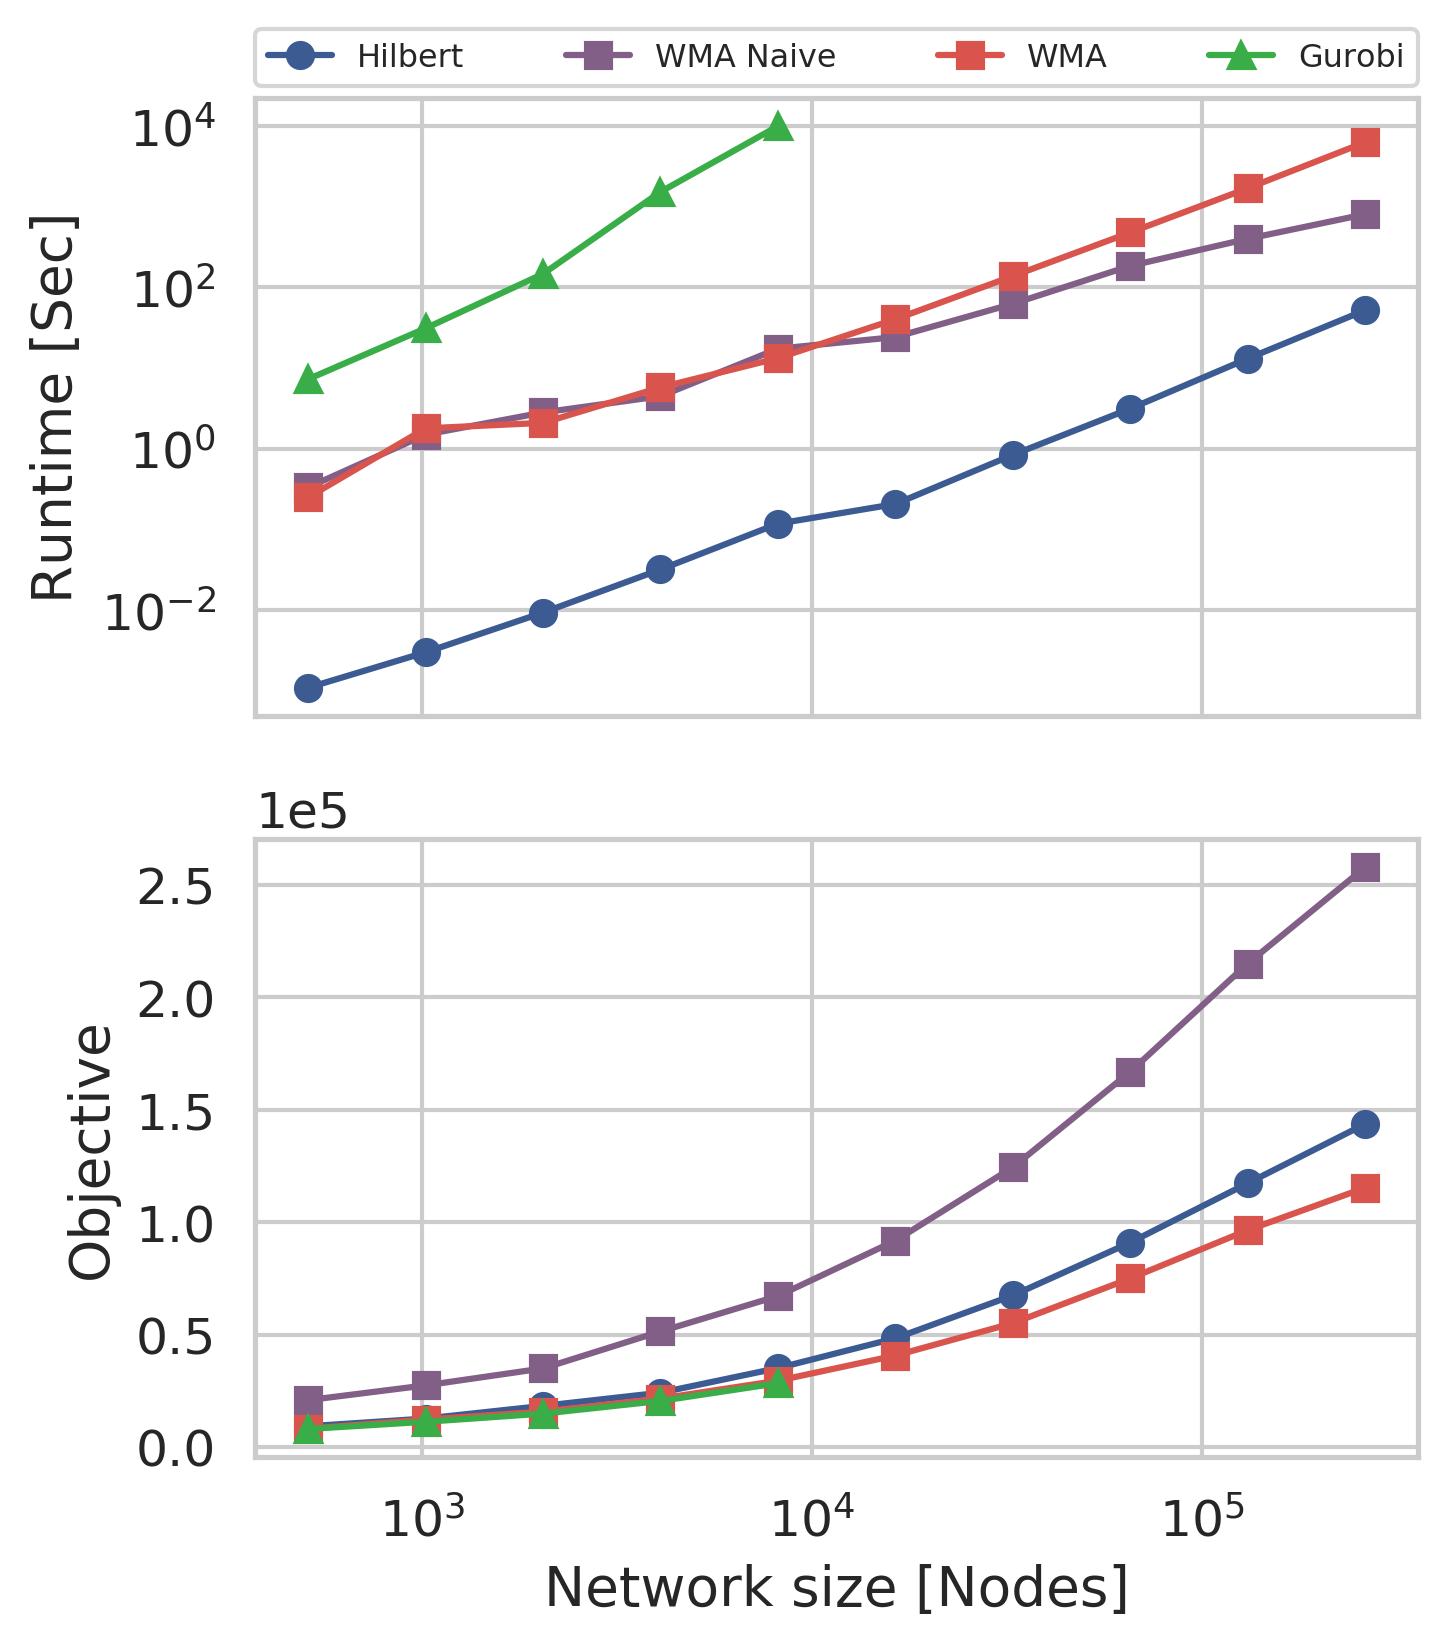

In [133]:
# ax2.set_ylim([7000,170000])
plot_all('n_m-n0.10_k-n0.01_c20_connected_d2','', True,xlabel="Network size [Nodes]")

No gurobi file exists for  gurobi


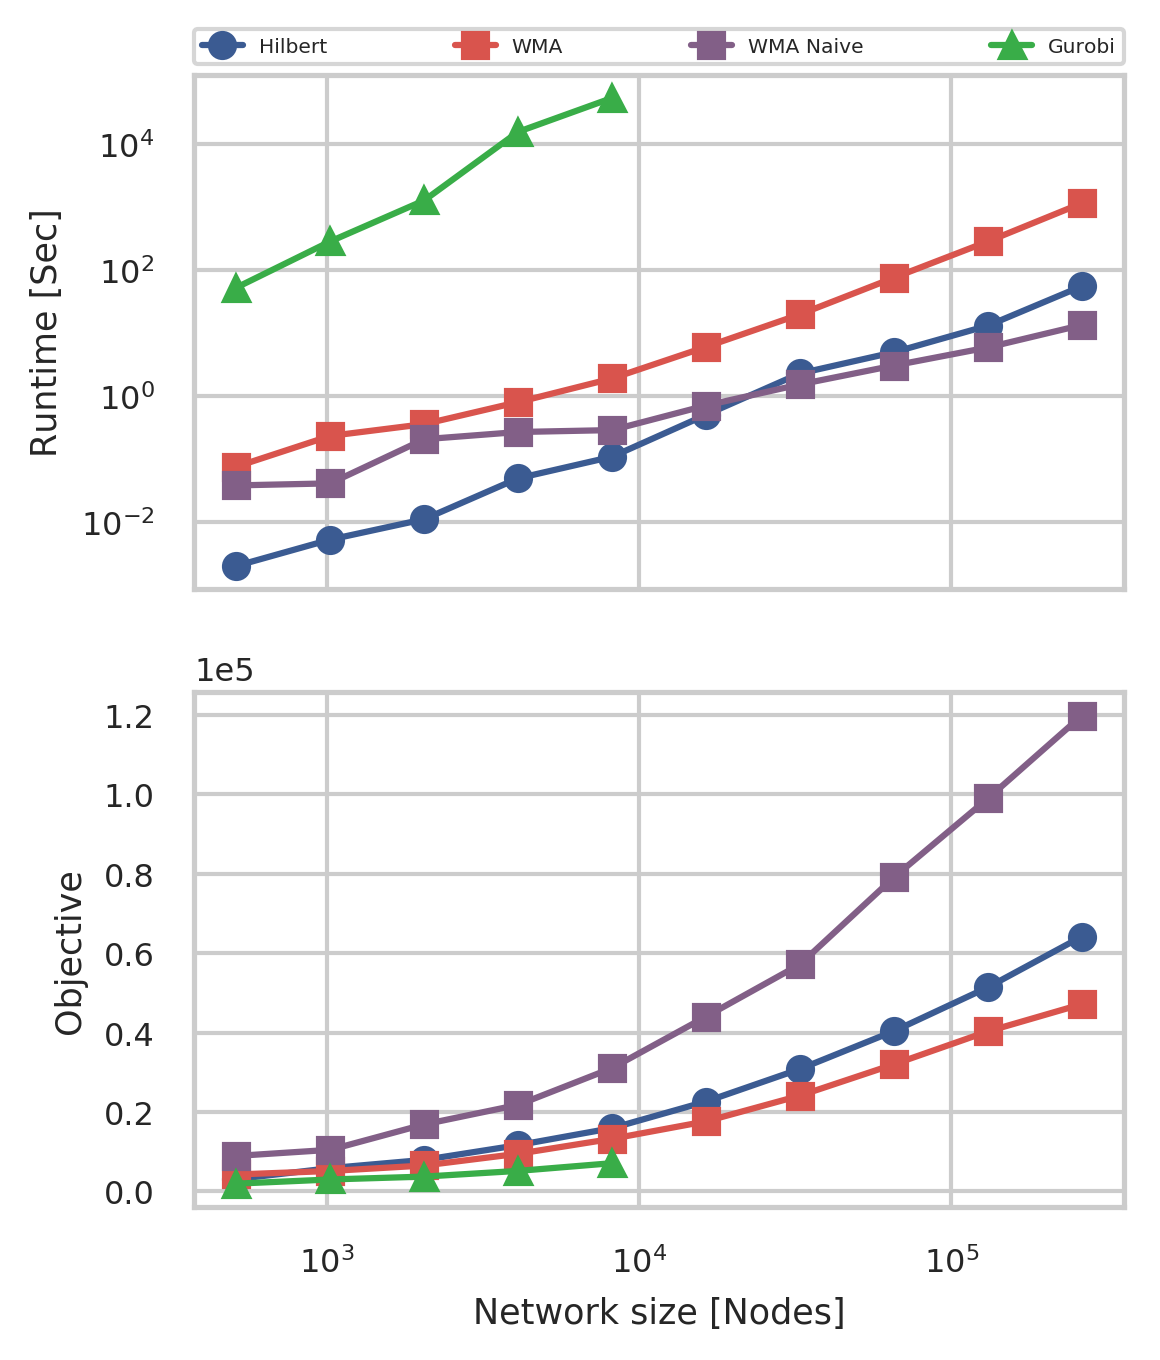

In [97]:
plot_all('n_m-n0.10_k-n0.01_c20_d0.8','', True)

No gurobi file exists for  gurobi
No gurobi file exists for  gurobi
No gurobi file exists for  gurobi
No gurobi file exists for  gurobi


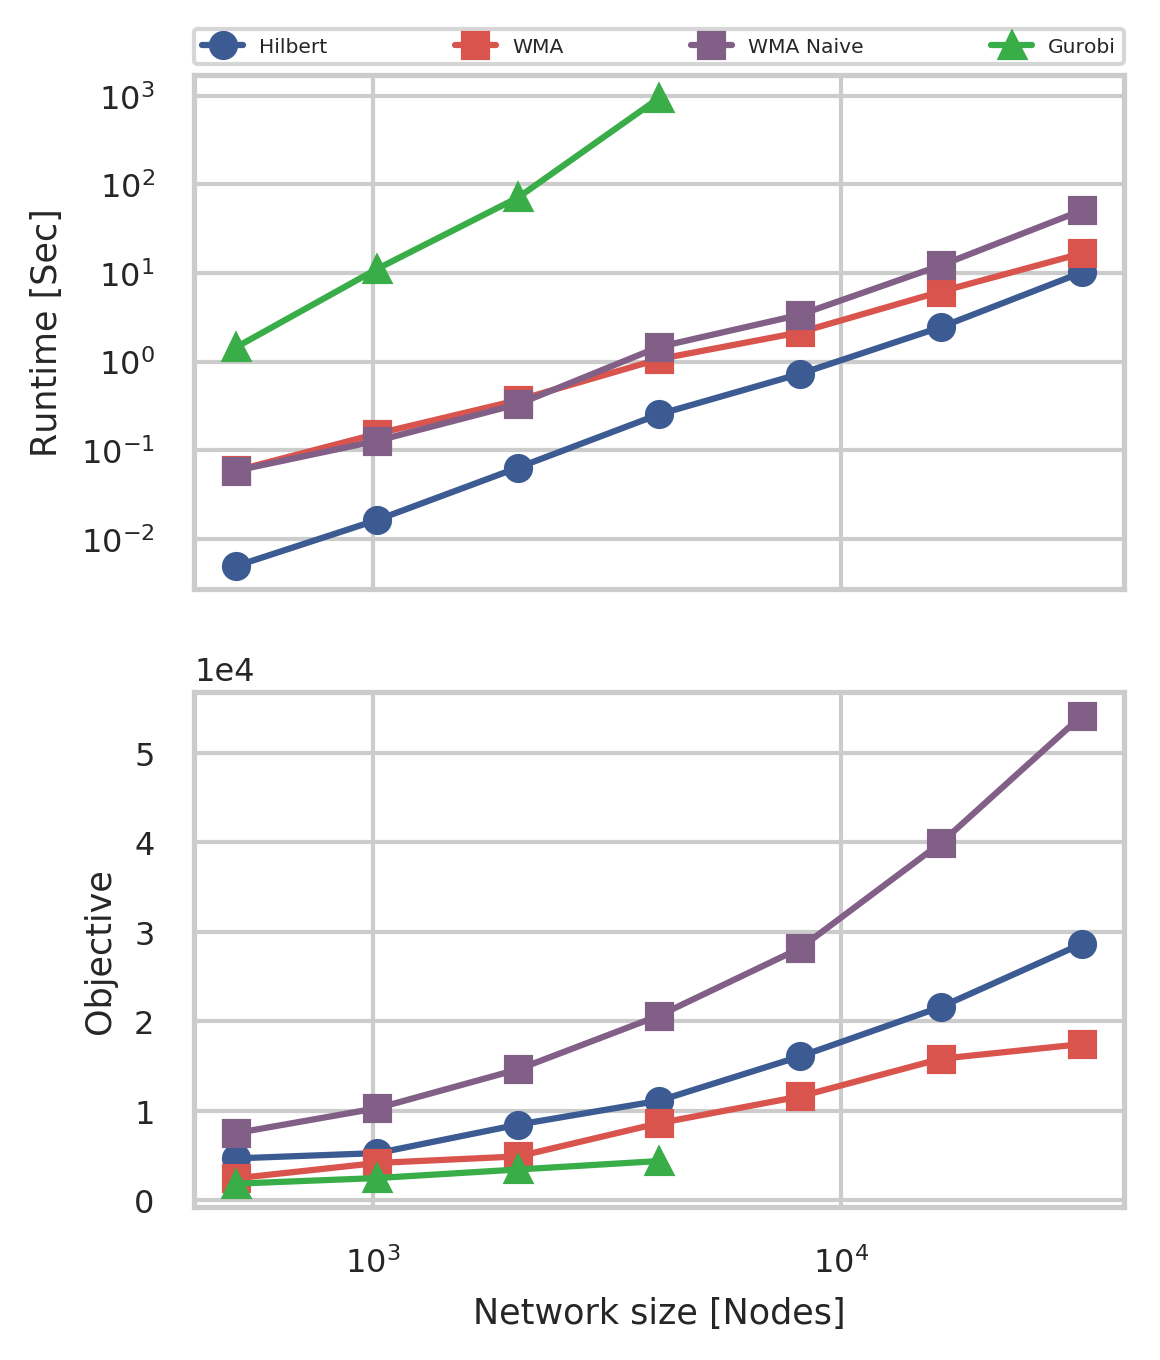

In [94]:
plot_all('multicap','', True)#,lims=(2*10**2, 2*10**4))

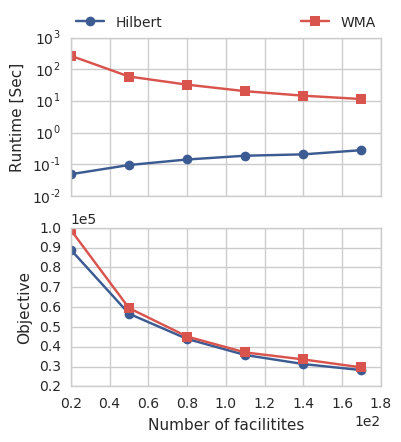

In [9]:
plot_all('kc_n10000m1000',"",sortby="number of facilities",xlabel="Number of facilitites",log=False)

# variable potential facility locations

In [97]:
expnames = [("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
            ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'s')]#,
#             ("nlr", "BRNN", sns.xkcd_rgb["amber"],'D'),
            #("gurobi", "Gurobi", sns.xkcd_rgb["medium green"],'^')]
# expnames = [("hilbert", "Hilbert", sns.xkcd_rgb["denim blue"],'o'),
#             ("fcla_l0", "WMA", sns.xkcd_rgb["pale red"],'s')]
typedir = "geometric_with_coords"

def plot_all_var_pot_loc(dirname, expname, log=True, sortby="vcount",xlabel="Network size [Nodes]"):
    fontscale = 1.1
    fig, (ax1, ax2) = plt.subplots(2,figsize=(4, 4.5), dpi=300)
    sns.set(font_scale=fontscale,style="whitegrid")
    
    for expname in expnames:
        results = load_results_pot_fac_loc(os.path.join(data_path, typedir, dirname, "solutions", expname[0]), 
                               os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
        results = results[results['objective'].notnull()]
        
        runtime_results = results['runtime'].copy()
        if (re.match(r'gurobi',expname[0])):
            for i in range(len(runtime_results)):
                try:
                    f = open(os.path.join(data_path, typedir, dirname, results.iloc[i]['id'] + '.ntw.txt'), "r")
                    distmatxtime = float(f.read())
                    f.close()
                    runtime_results.loc[results.iloc[i].name] += distmatxtime
                except IOError:
                    print("No gurobi file exists for ", expname[0])
                    
        sns.set(font_scale=fontscale,style="whitegrid")
        ax1.plot(results[sortby], runtime_results, expname[2], label=expname[1], marker=expname[3])
        ax2.plot(results[sortby], results['objective'], expname[2], label=expname[1], marker=expname[3])
        
    # setting first axis
    ax1.set_yscale("log", nonposx='clip')
    if (log):
        ax1.set_xscale("log", nonposx='clip', basex=10)
        ax2.set_xscale("log", nonposx='clip', basex=10)
        
    ax1.set_ylabel("Runtime [Sec]")
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=5, mode="expand", borderaxespad=0.)
    plt.setp(ax1.get_xticklabels(), visible=False)
    # setting second axis
#     ax2.ticklabel_format(style='sci', axis='y')
#     ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    ax2.yaxis.get_major_formatter().set_powerlimits((0, 0))
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    

No gurobi file exists for  gurobi
No gurobi file exists for  gurobi
No gurobi file exists for  gurobi
No gurobi file exists for  gurobi
No gurobi file exists for  gurobi
No gurobi file exists for  gurobi
No gurobi file exists for  gurobi
No gurobi file exists for  gurobi


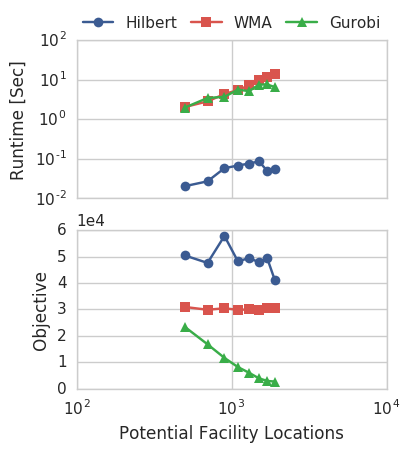

In [135]:
plot_all_var_pot_loc('var_pot_fac_loc','', True,sortby='pot_fac_loc',xlabel='Potential Facility Locations')

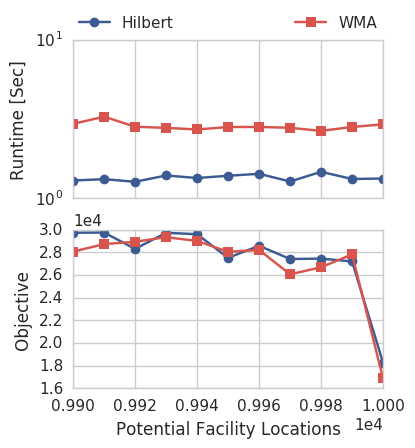

In [100]:
plot_all_var_pot_loc('var_pot_fac_loc_2','', False,sortby='pot_fac_loc',xlabel='Potential Facility Locations')

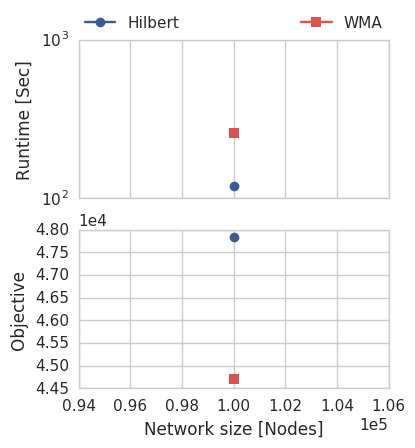

In [85]:
def plot_all_base(dirname, expname, log=True, sortby="vcount",xlabel="Network size [Nodes]"):
    fontscale = 1.1
    fig, (ax1, ax2) = plt.subplots(2,figsize=(4, 4.5), dpi=300)
    sns.set(font_scale=fontscale,style="whitegrid")
    
    for expname in expnames:
        results = load_results(os.path.join(data_path, typedir, dirname, "solutions_base", expname[0]), 
                               os.path.join(data_path,typedir,dirname)).sort_values(by=sortby)
        results = results[results['objective'].notnull()]
        
        runtime_results = results['runtime'].copy()
        if (re.match(r'gurobi',expname[0])):
            for i in range(len(runtime_results)):
                try:
                    f = open(os.path.join(data_path, typedir, dirname, results.iloc[i]['id'] + '.ntw.txt'), "r")
                    distmatxtime = float(f.read())
                    f.close()
                    runtime_results.loc[results.iloc[i].name] += distmatxtime
                except IOError:
                    print("No gurobi file exists for ", expname[0])
                    
        sns.set(font_scale=fontscale,style="whitegrid")
        ax1.plot(results[sortby], runtime_results, expname[2], label=expname[1], marker=expname[3])
        ax2.plot(results[sortby], results['objective'], expname[2], label=expname[1], marker=expname[3])
        
    # setting first axis
    ax1.set_yscale("log", nonposx='clip')
    if (log):
        ax1.set_xscale("log", nonposx='clip', basex=10)
        ax2.set_xscale("log", nonposx='clip', basex=10)
        
    ax1.set_ylabel("Runtime [Sec]")
    ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
              ncol=5, mode="expand", borderaxespad=0.)
    plt.setp(ax1.get_xticklabels(), visible=False)
    # setting second axis
#     ax2.ticklabel_format(style='sci', axis='y')
#     ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Objective")
    ax2.yaxis.get_major_formatter().set_powerlimits((0, 0))
    if (not log):
        ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plot_all_base('var_pot_fac_loc_2','', False)